# Chinese Oracle Born Scripts Text Mining

## Data Source

The data source is from the website : https://github.com/Chinese-Traditional-Culture/JiaGuWen 

## File Structure 
The Data folder contains 1602 samples:  
 - the Chinese Traditional Culture image in jpg format, and 
 - the database in db, sql, json format with the key-value paris of images and chinese characters.

![Index Html](../data/raw/index.jpg)

### 1 Read the JSON database to dataframe.

In [1]:
import pandas as pd
df = pd.read_json('../data/raw/index.json')

In [2]:
df

,image,name
0,3653610.jpg,安
1,3655161.jpg,安
2,3655689.jpg,安
3,3655818.jpg,八
4,3656106.jpg,八
...,...,...
1597,5023841.jpg,祖
1598,5023651.jpg,祖
1599,5026671.jpg,尊
1600,5026169.jpg,尊


In [3]:
# create a table of label and name.
# using integer(label) to represent the chinese character (string) for data mapping. 
temp = df['name'].value_counts().to_frame()
temp.reset_index(inplace=True)
temp.rename(columns={'name': 'count', 'index':'name'}, inplace=True)
temp.reset_index(inplace=True)
temp.rename(columns={'index': 'label'}, inplace=True)
temp.drop(columns=['count'], inplace=True)
temp

,label,name
0,0,子
1,1,合
2,2,酉
3,3,莫
4,4,朿
...,...,...
788,788,民
789,789,免
790,790,麋
791,791,尨


In [4]:
df_merge = pd.merge(df, temp, on='name')
df_merge

,image,name,label
0,3653610.jpg,安,151
1,3655161.jpg,安,151
2,3655689.jpg,安,151
3,3655818.jpg,八,237
4,3656106.jpg,八,237
...,...,...,...
1597,5023841.jpg,祖,332
1598,5023651.jpg,祖,332
1599,5026671.jpg,尊,333
1600,5026169.jpg,尊,333


In [5]:
# save the df_merge to a csv file for further use.
df_merge.to_csv('../data/processed/image_name_label.csv', index=False)

In [6]:
temp.to_csv('../data/processed/label_name.csv', index=False)

# 2 Check the Fonts Support 

Show chinese word in matplotlib figure.

In [7]:
import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt

fontP = font_manager.FontProperties()
# fontP.set_family('Arial Unicode MS')
# print(set([f.name for f in font_manager.fontManager.ttflist]))

plt.rcParams['font.family'] = 'Arial Unicode MS'

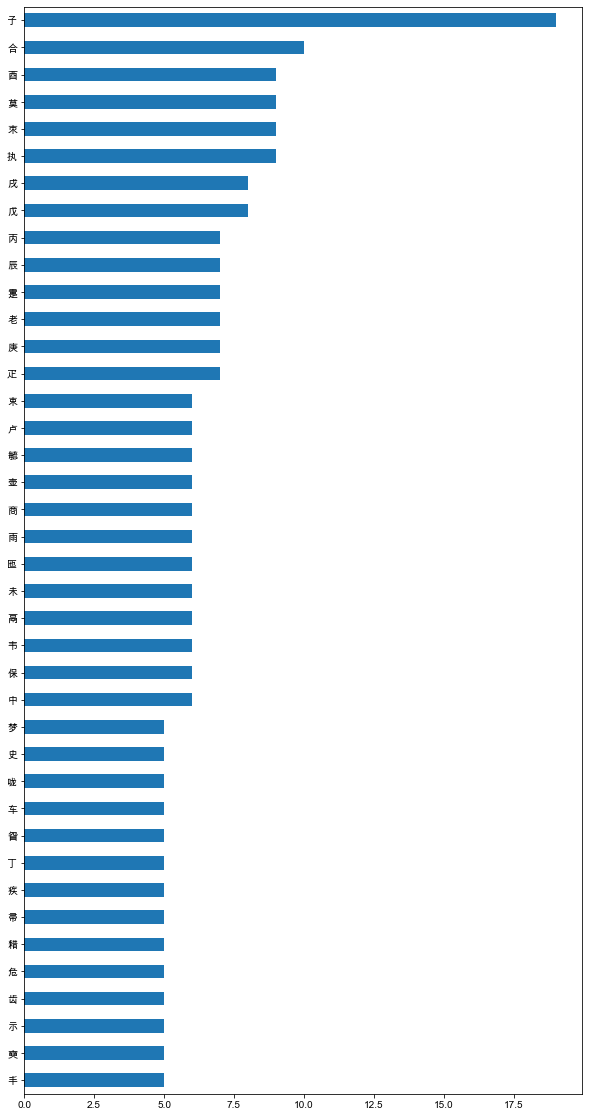

In [8]:
temp = df['name'].value_counts()
temp
ax = temp.head(40).plot(kind='barh', figsize=(10,20))
ax.invert_yaxis()

In [9]:
# read the image and the name
from skimage.io import imread
img = imread('../data/raw/image/' + df.image[0])
print(df.image[0], df.name[0])

3653610.jpg 安


In [10]:
print(img.shape)

(50, 50, 3)


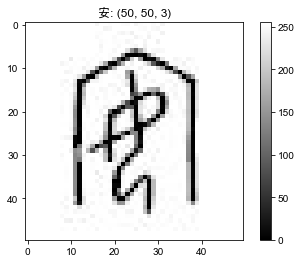

In [11]:
imgplot = plt.imshow(img, cmap='gray')
plt.title(f"{df.name[0]}: {img.shape}")
plt.colorbar()
plt.show()

In [12]:
img.shape, type(img)

((50, 50, 3), numpy.ndarray)

In [13]:
import numpy as np
onelayer= np.squeeze(img[:,:,0]) 
twolayer= np.squeeze(img[:,:,0]) 
comparison = onelayer == twolayer
equal_arrays = comparison.all()
print(equal_arrays)

True


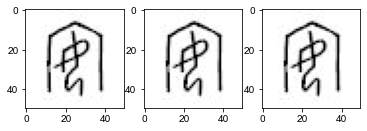

In [14]:
fig, axs = plt.subplots(1, 3)
axs[0].imshow(img[:,:,0], cmap='gray')
axs[1].imshow(img[:,:,1], cmap='gray')
axs[2].imshow(img[:,:,2], cmap='gray')
 

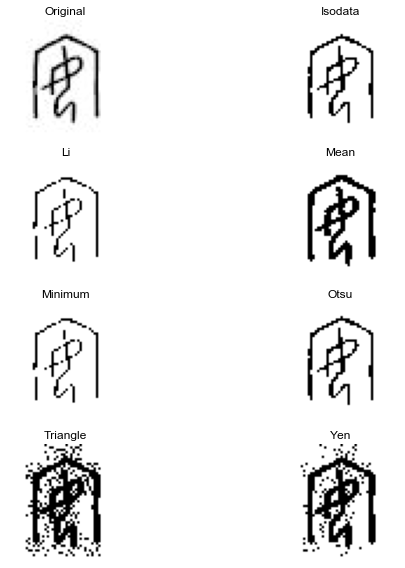

In [15]:
# Convert the image to grayscale (3D to 2D)
from skimage.color import rgb2gray
img_gray = rgb2gray(img)

# Compare the grayscale into different binary threshold
from skimage.filters import try_all_threshold
fig, ax = try_all_threshold(img_gray, figsize=(10, 8), verbose=False)
plt.show()

# If you are not familiar with the details of the different algorithms and the underlying assumptions, it is often difficult to know which algorithm will give the best results. Therefore, Scikit-image includes a function to evaluate thresholding algorithms provided by the library. At a glance, you can select the best algorithm for your data without a deep understanding of their mechanisms.

In [16]:
img_gray.shape, img_gray.max(), img_gray.min()

((50, 50), 1.0, 0.0)

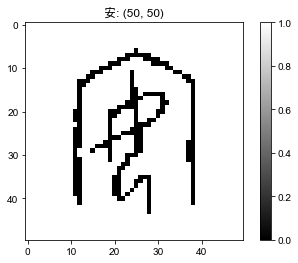

In [17]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(img_gray)
img_bin = img_gray > thresh
# plt.imshow(img_bin, cmap='gray')
imgplot = plt.imshow(img_bin, cmap='gray')
# imgplot.set_cmap('nipy_spectral')
plt.title(f"{df.name[0]}: {img_bin.shape}")
plt.colorbar()
plt.show()

In [18]:
img_bin, img_bin.astype(int), img_bin.astype(float)

(array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]))

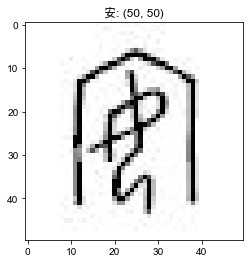

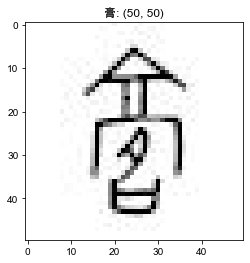

In [19]:
def plotimage(image_name, image_title):
    # df.image[id], df.name[id]
    fig, ax = plt.subplots()
    img = imread(fname='../data/raw/image/' + image_name)
    img_gray = rgb2gray(img)
    # thresh = threshold_otsu(img_gray)
    # img_bin = img_gray > thresh
    ax.imshow(img_gray, cmap='gray')
    ax.set_title(f"{image_title}: {img_gray.shape}")
    # plt.colorbar()
    plt.show()  
    return ax

ax = plotimage(df.image[0], df.name[0])

ax = plotimage(df.image[300], df.name[300])